# Install required packages

In [4]:
#for connection with postgres
pip install psycopg2-binary

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#for connection with twitter
pip install tweepy

In [36]:
# for text processing
pip install textblob

     |████████████████████████████████| 636 kB 3.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [207]:
#can't make it work in 3.8
!pip install WordCloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  ERROR: Command errored out with exit status 1:
   command: /opt/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/nx/54vsr3xx4y7g750jkrsnwfg40000gn/T/pip-install-xzcxha3j/WordCloud/setup.py'"'"'; __file__='"'"'/private/var/folders/nx/54vsr3xx4y7g750jkrsnwfg40000gn/T/pip-install-xzcxha3j/WordCloud/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/nx/54vsr3xx4y7g750jkrsnwfg40000gn/T/pip-wheel-t7u_bblc
       cwd: /private/var/folders/nx/54vsr3xx4y7g750jkrsnwfg40000gn/T/pip-install-xzcxha3j/WordCloud/
  Complete output (24 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.macosx-10.9-x86_64-3.8
  creating build/lib.macosx-10.9-x86_64-3.8/wordcloud
  copying wordcloud/wordcloud_cl

In [29]:
#nltk for text processing
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [83]:
#downloading stopwords and other required packs
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /Users/i854950/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/i854950/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/i854950/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [84]:
#importing packages
import tweepy
import psycopg2
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import numpy as np
from textblob import TextBlob
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [85]:
# Twitter API authentication

api_key =  'XX'
api_secret_key = 'XX'
access_token =  'XX'
access_token_secret =  'XX'

# authorize the API Key
authentication = tweepy.OAuthHandler(api_key, api_secret_key)

# authorization to user's access token and access token secret
authentication.set_access_token(access_token, access_token_secret)

# call the api
api = tweepy.API(authentication)

### TO GET TWEETS FROM MY TIMELINE

In [241]:
# Streaming tweets from home timeline

public_tweet = api.home_timeline(count=5)

for tweet in public_tweet:
    print("-->",tweet.text)

--> Do you think you have what it takes to solve them? #puzzle https://t.co/iEZhTeXVuE
--> Have you finished your holiday shopping yet? This year 60% of consumers plan to do their holiday shopping online. E… https://t.co/4qzDu29MF4
--> Congress leaders Sonia Gandhi and Rahul Gandhi accused BJP MP Subramanian Swamy of delaying proceedings in the Nati… https://t.co/iM0uwK1nvE
--> #Opinion: Prof. Ezra Vogel's passing will mean that a major, well-informed voice in support of Sino-US communicatio… https://t.co/iYZluWikko


### TO GET TWEETS FROM A SPECIFIC USER


In [242]:
user = "433"
public_tweet = api.user_timeline(id=user,count=10)

for tweet in public_tweet:
    print("->",tweet.text)

-> Theo Hernandez feeling the love from club legend Paolo Maldini 🙏❤️ https://t.co/WHezuNn9i0
-> A late double sees @ManUtd through to the EFL Cup SF 👹 https://t.co/OJlmUdMwGq
-> 💥 @OfficialASRoma move up to 3rd in the table after a thrilling match! https://t.co/EOhdwOM0lj
-> ⏱️ @TheoHernandez heads @acmilan back to the top of Serie A 🇮🇹 in injury time! https://t.co/T92eHOVeMb
-> THEO MALDINI ⏰ https://t.co/OzgeSDIoV4
-> 🇪🇸 @realmadrid move level on points with neighbors Atlético in La Liga https://t.co/DOCYVCvipm
-> Merry Xmas from Familia Messi 🎄 https://t.co/lDLetFCRrv
-> Can @spursofficial do it on a cold &amp; rainy Wednesday night at Stoke? They can! ☔️✔️ https://t.co/s4o03xXIj0
-> 🇮🇹 @inter 🔙🔛🔝in Serie A 🇮🇹 https://t.co/MkPywLwd8B
-> 👁 @oblakjan reserves special praise for all-seeing genius Messi https://t.co/gVVcrR4iuy


### TO GET TWEETS RELATED TO A SPEICIFIC SUBJECT

In [288]:
# Retrieve tweets
result = api.search(['America'], lang='en', count=10)

for tweet in result:
   print("->",tweet.text, "->", tweet.retweet_count)



-> RT @Sword0616: KOCOWA, an online premium streaming service which delivers Korean drama series to North America &amp; South America,  CHOOSES TH… -> 11
-> RT @ChampagneTex: America is so weird... let them cashiers sit down. I promise we don’t care. -> 18689
-> I am once again asking if anyone wants to treat Día De Los Reyes Magos as an actual holiday that happens with me, i… https://t.co/I2clymVRtC -> 0
-> RT @Stornoway_Cove: Trump is diverting 75% of the Georgia Senate run-off donations to his new Save America political action committee, whic… -> 37
-> Follow up 

I’m Latin X because I used the name of the first Holocaust massacre to smuggle in the entire agricultur… https://t.co/A49eNUOWpn -> 0
-> RT @ChampagneTex: America is so weird... let them cashiers sit down. I promise we don’t care. -> 18689
-> RT @AdrianNormanDC: COVID didn't ruin America's economy. 

Governors, state and local officials did. -> 7807
-> RT @PatBelam: @rubk2017 @careygilbert74 @Acosta This is one of the Iraq

In [244]:
#to get available attributes
print(result[0]._json.keys())

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang'])


In [126]:
print(result[0].lang)

en


### Create a custom class that will inherit the StreamListener class and overrides the on_status() method. Here we will write our own code to extract the relevant data from the tweet. 

In [273]:
class MyStreamListener(tweepy.StreamListener):
    
    def __init__(self, time_limit= 300):
        self.start_time = time.time()
        self.limit = time_limit
        super(MyStreamListener, self).__init__()
    
    def on_connect(self):
        print("Connected to Twitter API.")
        
    def on_status(self, status):
        
        
        # Tweet ID
        tweet_id = status.id
        
        # User ID
        user_id = status.user.id
        
        # Username
        username = status.user.name
        
        
        # Tweet
        if status.truncated == True:
            tweet = status.extended_tweet['full_text']
            hashtags = status.extended_tweet['entities']['hashtags']
        else:
            tweet = status.text
            hashtags = status.entities['hashtags']
        
        # Read hastags
        hashtags = read_hashtags(hashtags)            
        
        # Retweet count
        retweet_count = status.retweet_count
        
        # favorite count
        favorite_count = status.favorite_count
        
        # Language
        lang = status.lang
        
        
        # If tweet is not a retweet and tweet is in English
        if not hasattr(status, "retweeted_status") and lang=="en":
            # Connect to database
            dbConnect(user_id, username, tweet_id, tweet, retweet_count, favorite_count, hashtags)
            
        if (time.time() - self.start_time) > self.limit:
            
            print(time.time(), self.start_time, self.limit)
            return False
            
    def on_error(self, status_code):
        if status_code == 420:
            # Returning False in on_data disconnects the stream
            return False

### Since the hashtags field dictionary (containing hashtags and their character indexing in the tweet) is saved within a list in the entities field, I have written a custom method read_hashtags() to extract only the hashtags and save them in a Python list

In [128]:
def read_hashtags(tag_list):
    hashtags = []
    for tag in tag_list:
        hashtags.append(tag['text'])
    return hashtags

In [129]:
# Table creation for postgres
commands = (# Table 1
            '''Create Table TwitterUser(User_Id BIGINT PRIMARY KEY, User_Name TEXT);''',
            # Table 2
            '''Create Table TwitterTweet(Tweet_Id BIGINT PRIMARY KEY,
                                         User_Id BIGINT,
                                         Tweet TEXT,
                                         Retweet_Count INT,
                                         favorite_count INT,
                                         CONSTRAINT fk_user
                                             FOREIGN KEY(User_Id)
                                                 REFERENCES TwitterUser(User_Id));''',
            # Table 3
            '''Create Table TwitterEntity(Id SERIAL PRIMARY KEY,
                                         Tweet_Id BIGINT,
                                         Hashtag TEXT,
                                         CONSTRAINT fk_user
                                             FOREIGN KEY(Tweet_Id)
                                                 REFERENCES TwitterTweet(Tweet_Id));''')

In [274]:
# Connection to database server

import psycopg2

conn = psycopg2.connect(host="localhost",database="Twitter_database",port=5432,user='xxx',password='xxx')

In [275]:
#SQL commands for deleting all the rows from the table
delete_commands = (#table1
                '''DELETE FROM TwitterEntity; ''',
                 #table2
                '''DELETE FROM TwitterTweet; ''',
                #table3
                '''DELETE FROM TwitterUser; ''')


In [271]:
# Create cursor to execute delete table commands
cur = conn.cursor()

# Execute SQL commands
for command in delete_commands:
    # drop tables
    cur.execute(command)

# Close communication with server
conn.commit()
cur.close()
conn.close()

In [250]:
# Create cursor to execute SQL commands
cur = conn.cursor()

# Execute SQL commands
for command in commands:
    # Create tables
    cur.execute(command)

# Close communication with server
conn.commit()
cur.close()
conn.close()

DuplicateTable: relation "twitteruser" already exists


Whenever a tweet needs to be saved to the database, we will first open a connection to the database, execute the SQL command to the database, commit the changes, and finally close the connection. This is what is happening in the dbConnect() method below

In [253]:
# Insert Tweet data into database
def dbConnect(user_id, user_name, tweet_id, tweet, retweet_count,favorite_count, hashtags):
    
    conn = psycopg2.connect(host="localhost",database="Twitter_database",port=5432,user='XXX',password='XXX')
    
    cur = conn.cursor()

    # insert user information
    command = '''INSERT INTO TwitterUser (user_id, user_name) VALUES (%s,%s) ON CONFLICT
                 (User_Id) DO NOTHING;'''
    cur.execute(command,(user_id,user_name))

    # insert tweet information
    command = '''INSERT INTO TwitterTweet (tweet_id, user_id, tweet, retweet_count,favorite_count) VALUES (%s,%s,%s,%s, %s);'''
    cur.execute(command,(tweet_id, user_id, tweet, retweet_count, favorite_count))
    
    # insert entity information
    for i in range(len(hashtags)):
        hashtag = hashtags[i]
        command = '''INSERT INTO TwitterEntity (tweet_id, hashtag) VALUES (%s,%s);'''
        cur.execute(command,(tweet_id, hashtag))
    
    # Commit changes
    conn.commit()
    
    # Disconnect
    cur.close()
    conn.close()
    

In [276]:
import time
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth=api.auth, listener=myStreamListener,
                        tweet_mode="extended")
myStream.filter(track=['America'])

Connected to Twitter API.
1608775812.122159 1608775512.0791302 300


In [255]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
#print(stopwords.words('english'))
import numpy as np
from textblob import TextBlob
import re
#from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [256]:
# Cleaning the tweets
def preprocess(tweet):
    
    # remove links
    tweet = re.sub(r'http\S+', '', tweet)
    # remove mentions
    tweet = re.sub("@\w+","",tweet)
    # alphanumeric and hashtags
    tweet = re.sub("[^a-zA-Z#]"," ",tweet)
    # remove multiple spaces
    tweet = re.sub("\s+"," ",tweet)
    tweet = tweet.lower()
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    sent = ' '.join([lemmatizer.lemmatize(w) for w in tweet.split() if len(lemmatizer.lemmatize(w))>3])

    return sent

In [277]:
# Connecting to the Database
def DbConnect(query):
    
    conn = psycopg2.connect(host="localhost",database="Twitter_database",port=5432,user='XXXX',password='XXXX')
    curr = conn.cursor()
    
    curr.execute(query)
    
    rows = curr.fetchall()
    
    return rows

In [278]:
# Creating a dataframe of user id, tweet id and tweets
data_tweet = DbConnect("SELECT User_Id, Tweet_Id, Tweet FROM TwitterTweet;")

df_tweet = pd.DataFrame(columns=['User_Id','Tweet_Id','Clean_Tweet'])

for data in data_tweet:
    index = len(df_tweet)
    df_tweet.loc[index,'User_Id'] = data[0]
    df_tweet.loc[index,'Tweet_Id'] = data[1]
    df_tweet.loc[index,'Clean_Tweet'] = preprocess(data[2])
    
df_tweet.head()

,User_Id,Tweet_Id,Clean_Tweet
0,1278770235194163202,1341926722543841282,asset acquires logistics specialist investor #epl
1,271222727,1341927862824296448,america sweetheart runner time
2,762370444477345792,1341927870092857345,truth watch were doubting cheating know must #...
3,19377194,1341927882810150917,fuck fuck everyone know both criminal will ult...
4,1333719928185163776,1341927897746071552,destory republicon confederate domestic terror...


In [72]:
#remove stop words
#from nltk.tokenize import word_tokenize

#stop_words = set(stopwords.words('english'))  
  
#df_tweet['Clean_Tweet'].apply(lambda x: [item for item in x if item not in stop_words])


0       [r, e, p, l, c, e, e, n,  , k,  , b, e,  , h, ...
1       [w, e, l, l,  , n, e,  , n, e, e, r,  , l,  , ...
2                          [n, h, n, g,  , w, l, l,  , p]
3       [g, u, e,  , n, h, n, g,  , h, v, n, g,  , r, ...
4                                                  [r, r]
                              ...                        
2364    [c, v,  , e,  , c, e,  , b, c, k,  , n, e, g, ...
2365                                            [l,  , h]
2366    [h,  , u, r,  , c, h, l,  , p, r, n, c, p, l, ...
2367    [b, e, c, u, e,  , h, e, r, e,  , c, v,  , j, ...
2368    [l,  , c, v,  , e, h,  , l,  , e, q, u, l,  , ...
Name: Clean_Tweet, Length: 2369, dtype: object

In [279]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df_tweet['Clean_Tweet_no_stop_words'] = df_tweet['Clean_Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [280]:
df_tweet['Clean_Tweet_no_stop_words']

0      asset acquires logistics specialist investor #epl
1                         america sweetheart runner time
2      truth watch doubting cheating know must #stopt...
3      fuck fuck everyone know criminal ultimately pr...
4      destory republicon confederate domestic terror...
                             ...                        
788    president trump deep state ball even fully und...
789                                               please
790                  republican latest bill #vetothebill
791    letter editor tuned president elect biden chri...
792                                  worst #impotus fuck
Name: Clean_Tweet_no_stop_words, Length: 793, dtype: object

In [281]:
#count the words and count how many times they have been repeated
from collections import Counter
results = Counter()
df_tweet['Clean_Tweet_no_stop_words'].str.lower().str.split().apply(results.update)
print(results)

Counter({'america': 651, 'trump': 115, 'american': 74, 'people': 72, 'president': 56, 'like': 46, 'country': 46, 'first': 42, 'love': 40, 'need': 38, 'know': 35, 'time': 34, 'state': 33, 'right': 32, 'bless': 31, 'biden': 29, 'world': 28, 'pardon': 28, 'year': 27, 'corrupt': 27, 'even': 26, 'united': 26, 'would': 26, 'last': 24, 'money': 24, 'never': 24, 'thing': 23, 'still': 23, 'vote': 23, 'republican': 23, 'life': 23, 'congress': 23, 'going': 23, 'think': 22, 'china': 22, 'make': 22, 'bill': 21, 'covid': 21, 'christmas': 20, 'want': 20, 'election': 20, 'democrat': 19, 'stop': 19, 'hate': 19, 'ally': 19, 'longer': 19, 'said': 19, 'history': 19, 'party': 18, 'thank': 18, 'much': 18, 'give': 18, 'free': 18, 'shall': 18, 'help': 18, 'criminal': 17, 'show': 17, 'ever': 17, 'democracy': 17, 'please': 17, 'really': 16, 'today': 16, 'back': 16, 'death': 16, 'stand': 16, 'great': 16, 'another': 16, 'everyone': 15, 'constitution': 15, 'care': 15, 'save': 15, 'made': 15, 'member': 15, 'fall': 

In [282]:
#Creating a dataframe for common words
common_words = pd.DataFrame(results.items())

In [283]:
#Common words sorted
common_words_sorted = common_words.sort_values(by = [1], ascending = False).head(10)
common_words_sorted.head(5)

,0,1
6,america,651
73,trump,115
115,american,74
77,people,72
216,president,56


Text(0.5, 1.0, "Common words on twitter on Dec 23rd 2020 if you search 'America'")

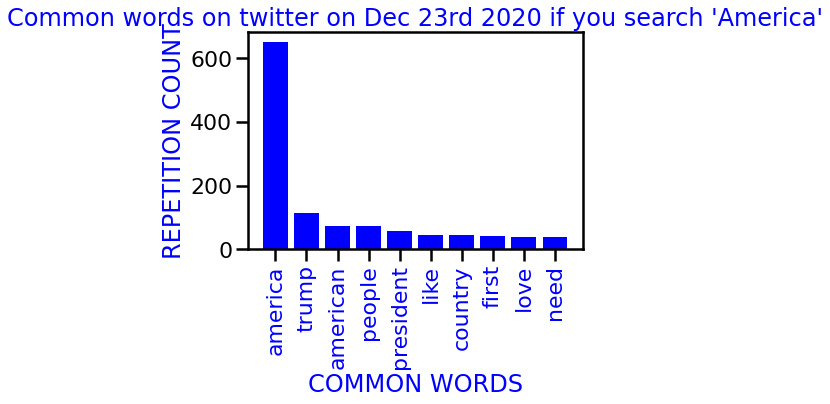

In [284]:
#Create a bar chart for top 10 words repeated most
plt.bar(common_words_sorted[0], common_words_sorted[1], color = 'blue')
plt.xticks(rotation = 'vertical', color = 'blue')
plt.xlabel("COMMON WORDS", color = 'blue')
plt.ylabel("REPETITION COUNT", color = 'blue')
plt.title("Common words on twitter on Dec 23rd 2020 if you search 'America'", color = 'blue')

In [285]:
# Querying hashtags from database
data_tags = DbConnect("SELECT Tweet_Id, Hashtag FROM TwitterEntity;")

df_tags = pd.DataFrame(columns=['Tweet_Id','Hashtags'])

for data in data_tags:
    index = len(df_tags)
    df_tags.loc[index,'Tweet_Id'] = data[0]
    df_tags.loc[index,'Hashtags'] = preprocess(data[1])
    
df_tags.head(20)

,Tweet_Id,Hashtags
0,1341926877754093569,
1,1341926877754093569,
2,1341926877754093569,fplsu
3,1341927136794308608,
4,1341927136794308608,liverpool
5,1341927136794308608,fplsu
6,1341927671828078592,
7,1341927671828078592,leeds
8,1341927671828078592,fplsu
9,1341927862832484352,atozbest salbum


In [286]:
# Unique hashtag counts
table = df_tags.pivot_table(index="Hashtags",values='Tweet_Id',aggfunc=len)

# Convert pivot table to dataframe
df_pivot = pd.DataFrame(table.to_records())

df_pivot.head()

,Hashtags,Tweet_Id
0,,17
1,america,8
2,americafirst,2
3,american,4
4,atozbest salbum,1


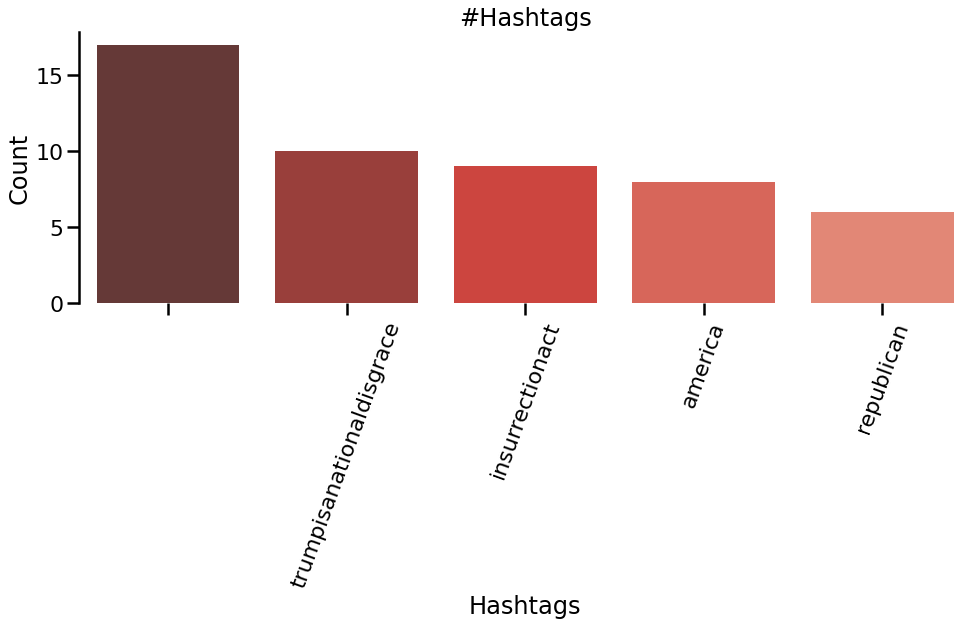

In [287]:
data = df_pivot.nlargest(columns="Tweet_Id", n = 5) 

# Creating bar graph
plt.figure(figsize=(16,5))
ax = sns.barplot(data=data, x= "Hashtags", y = "Tweet_Id", palette=("Reds_d"))

# Altering the visual elements
sns.set_context("poster")
ax.set(ylabel = 'Count')
ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=70)

plt.title('#Hashtags')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Output plot
plt.show()